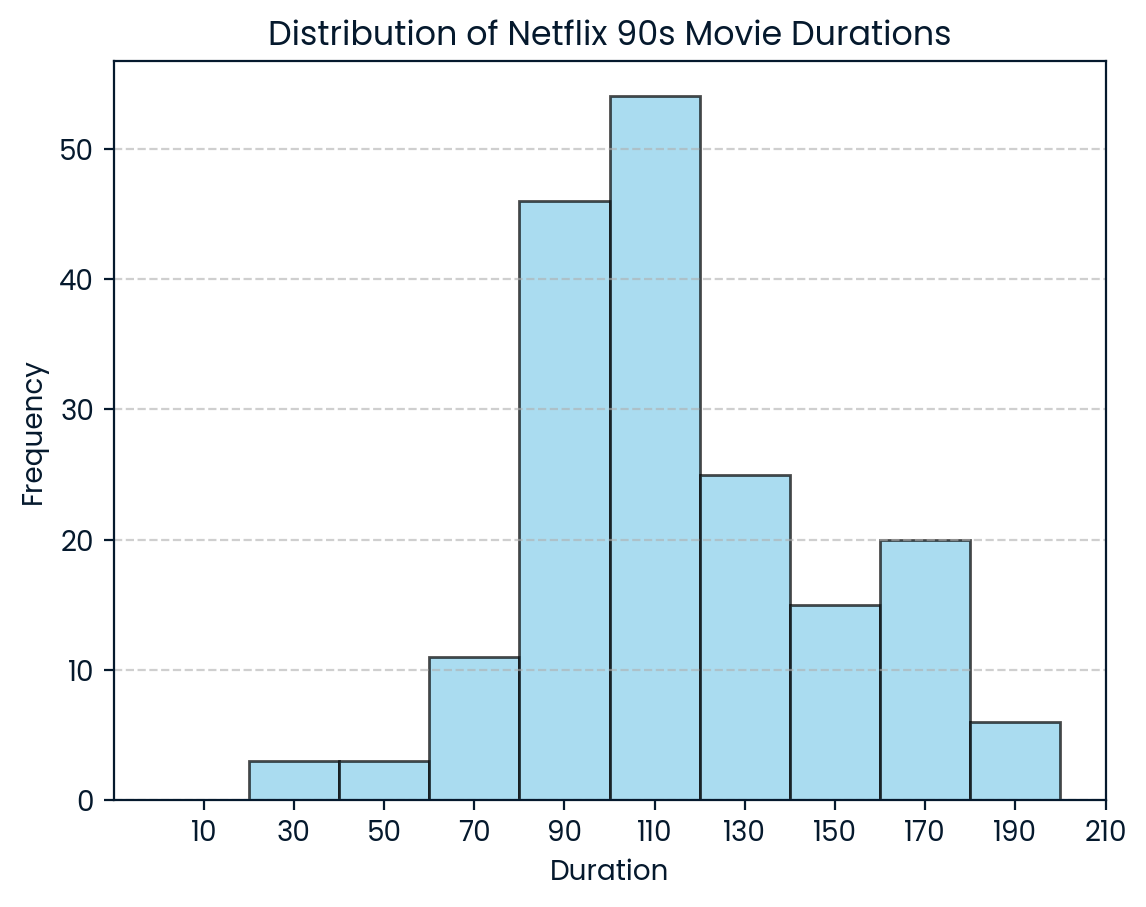

In [186]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read Netflix data
netflix_df = pd.read_csv("netflix_data.csv")

# Filter movies released in the 1990s
netflix_movies_90s = netflix_df[
    np.logical_and(netflix_df['type'] == 'Movie',
                  np.logical_and(netflix_df['release_year'] >= 1990,
                                 netflix_df['release_year'] < 2000))
]

# Extract durations
durations = netflix_movies_90s['duration']

# Plot histogram of durations
plt.hist(durations, np.arange(0, 220, 20), color='skyblue', edgecolor='black', alpha=0.7)

# Set x-axis ticks
plt.xticks(np.arange(10, 220, 20))

# Labels and title
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.title('Distribution of Netflix 90s Movie Durations')

# Add horizontal grid lines
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Show plot
plt.show()


<Figure size 640x480 with 0 Axes>

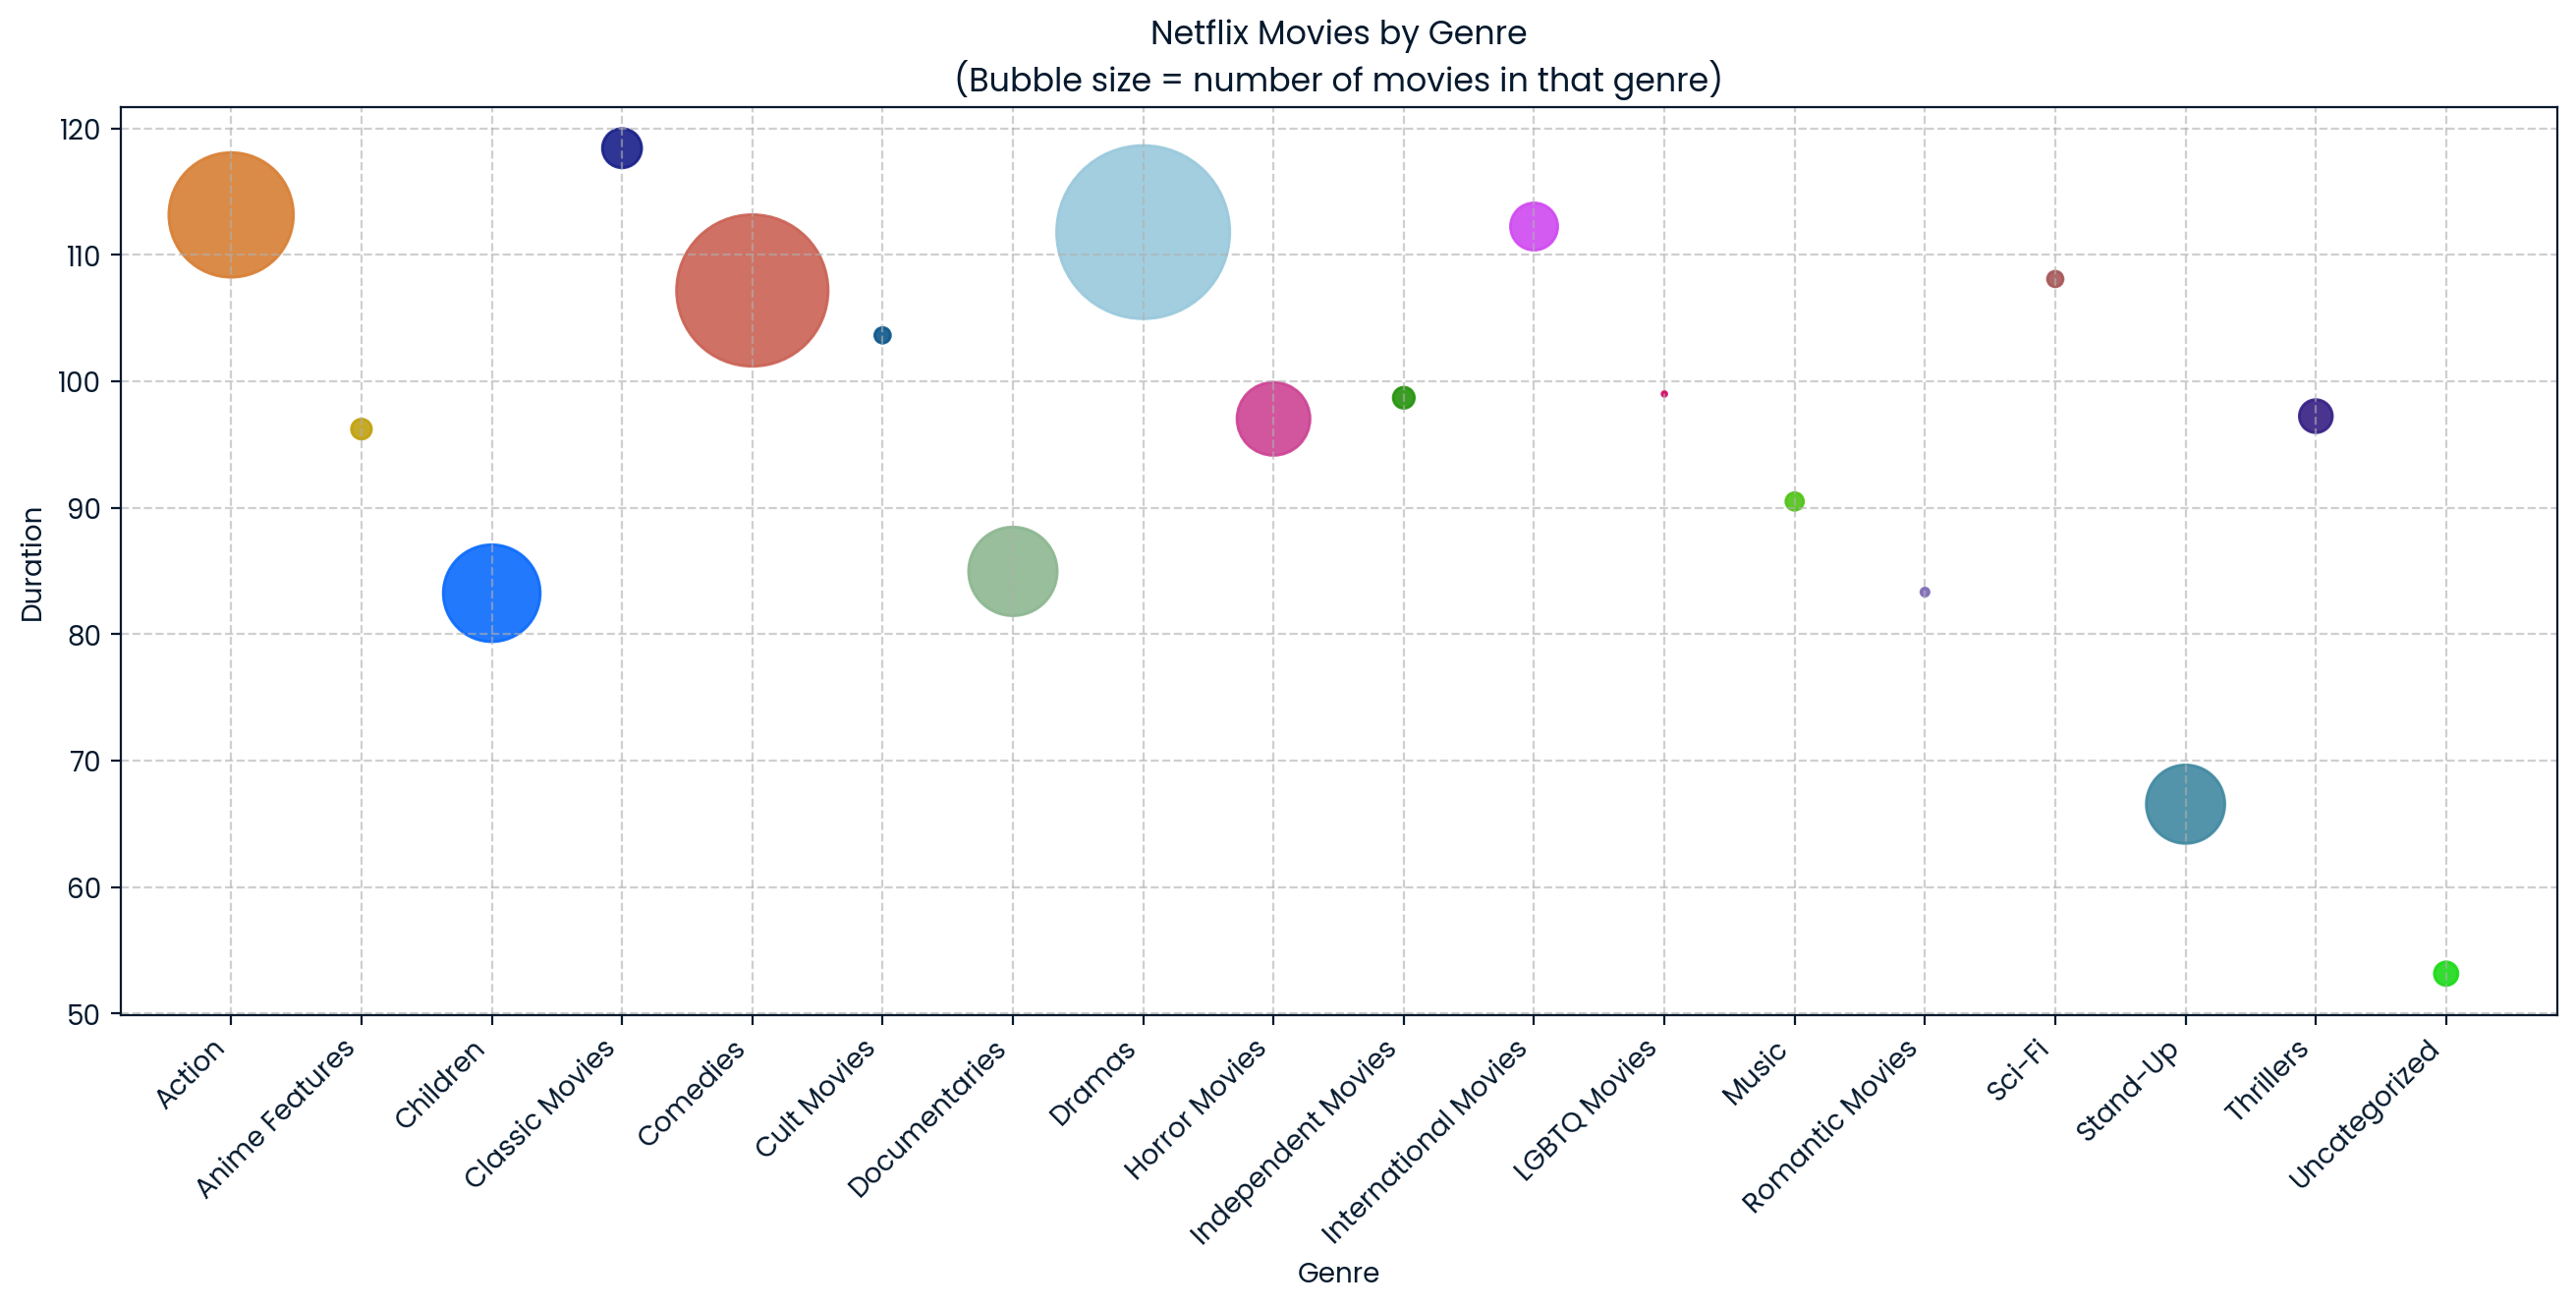

In [187]:
# Find the most common duration
duration = np.argmax(np.bincount(durations))

# Filter short Action movies in the 90s
short_action_90s = netflix_movies_90s[
    np.logical_and(netflix_movies_90s['genre'] == 'Action',
                  netflix_movies_90s['duration'] < 90)
]

# Count of short Action movies
short_movie_count = len(short_action_90s)

# Select all movies
ntf_mv = netflix_df[netflix_df['type'] == 'Movie']

# Extract durations and genres
short_durations = ntf_mv['duration']
shrot_genres = ntf_mv['genre']

# Get unique genres and counts
genres, counts = np.unique(shrot_genres, return_counts=True)

# Compute mean duration per genre
mean_duration_df = ntf_mv.groupby('genre')['duration'].mean().reset_index()
mean_duration_df.columns = ['genre', 'mean_duration']

# Ensure genres in mean_duration_df follow the same order as `genres`
mean_duration_df['genre'] = pd.Categorical(mean_duration_df['genre'], categories=genres, ordered=True)
mean_duration_df = mean_duration_df.sort_values('genre').reset_index(drop=True)

# Clear previous plots
plt.clf()
np.random.seed(119)  # For reproducible colors
colors = np.random.rand(len(genres), 3)  # Random RGB colors for each genre

# Set figure size
plt.figure(figsize=(16,6))

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Labels, title, and grid
plt.xlabel("Genre")
plt.ylabel("Duration")
plt.grid(True, linestyle='--', alpha=0.6)
plt.title("Netflix Movies by Genre\n(Bubble size = number of movies in that genre)")

# Scatter plot: x = genre, y = mean duration, size = movie count, color = random
plt.scatter(mean_duration_df['genre'], mean_duration_df['mean_duration'], s = counts * 3, c = colors, alpha=0.9)

# Show plot
plt.show()